In [1]:
cd ..

/home/tommy/Scrivania/Polimi/Honours Programme/SCFR


In [2]:
from data_structures.trees import *
from utilities.drawing import draw_tree
from data_structures.cfr_trees import CFRTree, CFRJointStrategy, CFRNode
from cfr_code.reconstruction_cfr import SolveWithReconstructionCFR
from cfr_code.sample_cfr import SolveWithSampleCFR
from cfr_code.cfr import SolveWithCFR
import ast
from utilities.graphs import epsilon_graph, comparative_epsilon_graph

In [3]:
%load_ext autoreload
%autoreload 2

# Coordination game

In [97]:
coordination_tree = Tree()

In [98]:
n1 = coordination_tree.addNode(1, 1, coordination_tree.root)
n2 = coordination_tree.addNode(1, 1, coordination_tree.root)

In [99]:
coordination_tree.addLeaf(n1, [1, 1])
coordination_tree.addLeaf(n1, [0, 0])
coordination_tree.addLeaf(n2, [0, 0])
coordination_tree.addLeaf(n2, [1, 1])

Leaf6 (children of Node2 via Action 1.1) -  utility is [1, 1]

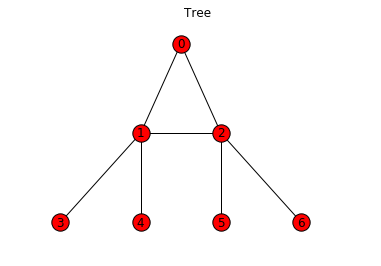

In [100]:
draw_tree(coordination_tree)

In [101]:
coord_res = []
ct = CFRTree(coordination_tree)
coord_res.append(SolveWithReconstructionCFR(ct, iterations = 100, reconstructEveryIteration = 1,
                                 reconstructWithOptimalPlan = False, checkEveryIteration = 1))
ct = CFRTree(coordination_tree)
coord_res.append(SolveWithSampleCFR(ct, iterations = 100, checkEveryIteration = 1))
ct = CFRTree(coordination_tree)
coord_res.append(SolveWithCFR(ct, iterations = 100, checkEveryIteration = 1))

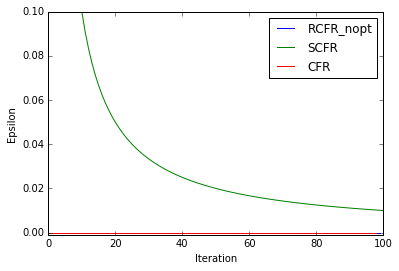

In [136]:
comparative_epsilon_graph(coord_res, legend = ['RCFR_nopt', 'SCFR', 'CFR'], ylims = (-0.001, 0.1))

# Permutation game

In [151]:
permutation_tree = Tree(3)

In [152]:
n1 = permutation_tree.addNode(1, 1, permutation_tree.root)
n2 = permutation_tree.addNode(2, 2, n1)
n3 = permutation_tree.addNode(2, 2, n1)

n4 = permutation_tree.addNode(2, 2, permutation_tree.root)
n5 = permutation_tree.addNode(1, 1, n4)
n6 = permutation_tree.addNode(1, 1, n4)

In [153]:
permutation_tree.addLeaf(n2, [-2, -2, -2])
permutation_tree.addLeaf(n2, [0, 0, 0])
permutation_tree.addLeaf(n3, [2, 2, 2])
permutation_tree.addLeaf(n3, [0, 0, 0])
permutation_tree.addLeaf(n5, [0, 0, 0])
permutation_tree.addLeaf(n5, [2, 2, 2])
permutation_tree.addLeaf(n6, [0, 0, 0])
permutation_tree.addLeaf(n6, [-2, -2, -2])

Leaf14 (children of Node6 via Action 1.1) -  utility is [-2, -2, -2]

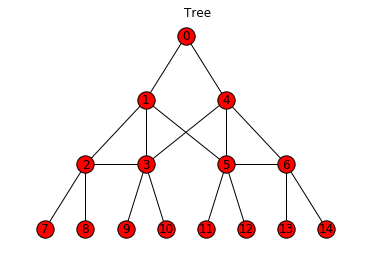

In [154]:
draw_tree(permutation_tree)

In [14]:
perm_res = []
ct = CFRTree(permutation_tree)
perm_res.append(SolveWithReconstructionCFR(ct, iterations = 100, reconstructEveryIteration = 1,
                                 reconstructWithOptimalPlan = False, checkEveryIteration = 1))
ct = CFRTree(permutation_tree)
perm_res.append(SolveWithSampleCFR(ct, iterations = 100, checkEveryIteration = 1))
ct = CFRTree(permutation_tree)
perm_res.append(SolveWithCFR(ct, iterations = 100, checkEveryIteration = 1))

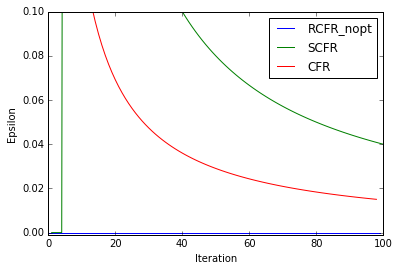

In [15]:
comparative_epsilon_graph(perm_res, legend = ['RCFR_nopt', 'SCFR', 'CFR'], ylims = (-0.001, 0.1))

In [4]:
from games.permutation import *

In [8]:
#big_perm_tree = build_permutation_game_tree(4, 3, utility_params = [[1, -2, 3], [-4, 5, -6], [7, -8, 9]])

big_perm_tree = build_permutation_game_tree(5, 3, utility_params = [[-5, 5, 4], [2, -5, 3], [1, 2, -5]])

# [BOH] big_perm_tree = build_permutation_game_tree(4, 3, utility_params = [[-1, 1, 0], [0, -1, 1], [1, 0, -1]])

In [9]:
print("Size = " + str(big_perm_tree.node_count) + " nodes")

Size = 43766 nodes


In [10]:
big_perm_res = []
print("--------------- RCFR ---------------")
ct = CFRTree(big_perm_tree)
big_perm_res.append(SolveWithReconstructionCFR(ct, iterations = 150, reconstructEveryIteration = 5,
                                 reconstructWithOptimalPlan = False, checkEveryIteration = 5,
                                 show_perc = True))
print("--------------- SCFR ---------------")
ct = CFRTree(big_perm_tree)
big_perm_res.append(SolveWithSampleCFR(ct, iterations = 250, checkEveryIteration = 5, show_perc = True))
print("--------------- CFR ---------------")
ct = CFRTree(big_perm_tree)
big_perm_res.append(SolveWithCFR(ct, iterations = 200, checkEveryIteration = 5, show_perc = True))

--------------- RCFR ---------------
10.0%
20.0%
30.0%
40.0%
50.0%
60.0%
70.0%
80.0%
90.0%
100.0%
--------------- SCFR ---------------
10.0%
20.0%
30.0%
40.0%
50.0%
60.0%
70.0%
80.0%
90.0%
100.0%
--------------- CFR ---------------
10.0%
20.0%
30.0%
40.0%
50.0%
60.0%
70.0%
80.0%
90.0%
100.0%


In [14]:
leaves = set()
CFRTree(big_perm_tree).root.find_terminals(leaves)
min_u = min(leaves, key = lambda n: n.utility[0]).utility
max_u = max(leaves, key = lambda n: n.utility[0]).utility
delta_utility = max_u[0] - min_u[0]

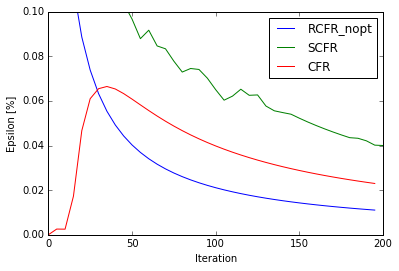

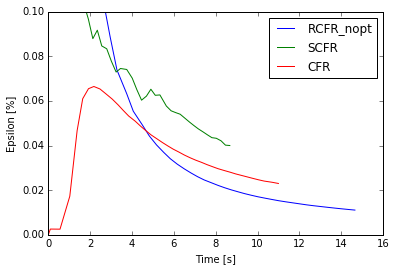

In [166]:
comparative_epsilon_graph(big_perm_res, delta_utility = delta_utility, legend = ['RCFR_nopt', 'SCFR', 'CFR'], 
                          ylims = (0, 0.1))
comparative_epsilon_graph(big_perm_res, delta_utility = delta_utility, legend = ['RCFR_nopt', 'SCFR', 'CFR'], 
                          ylims = (0, 0.1), xaxis = 'time')

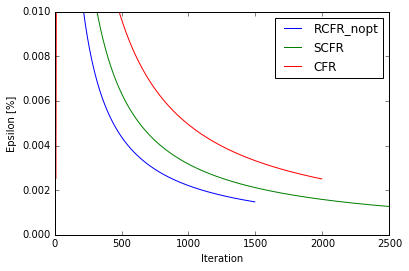

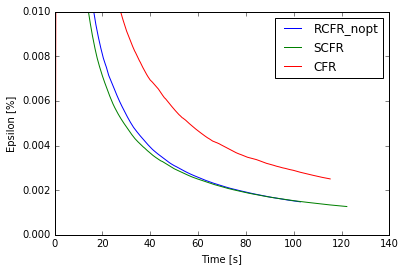

In [175]:
comparative_epsilon_graph(big_perm_res, delta_utility = delta_utility, legend = ['RCFR_nopt', 'SCFR', 'CFR'], 
                          ylims = (0, 0.01))
comparative_epsilon_graph(big_perm_res, delta_utility = delta_utility, legend = ['RCFR_nopt', 'SCFR', 'CFR'], 
                          ylims = (0, 0.01), xaxis = 'time')

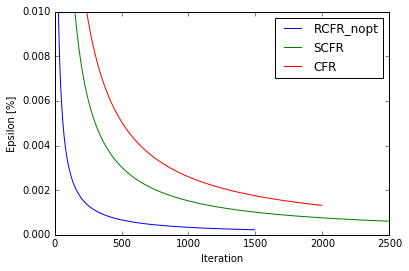

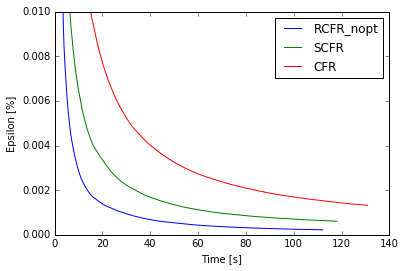

In [180]:
comparative_epsilon_graph(big_perm_res, delta_utility = delta_utility, legend = ['RCFR_nopt', 'SCFR', 'CFR'], 
                          ylims = (0, 0.01))
comparative_epsilon_graph(big_perm_res, delta_utility = delta_utility, legend = ['RCFR_nopt', 'SCFR', 'CFR'], 
                          ylims = (0, 0.01), xaxis = 'time')

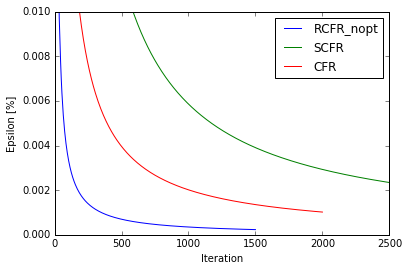

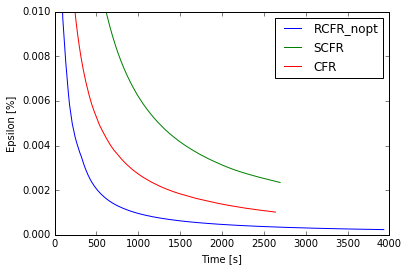

In [87]:
comparative_epsilon_graph(big_perm_res, delta_utility = delta_utility, legend = ['RCFR_nopt', 'SCFR', 'CFR'], 
                          ylims = (0, 0.01))
comparative_epsilon_graph(big_perm_res, delta_utility = delta_utility, legend = ['RCFR_nopt', 'SCFR', 'CFR'], 
                          ylims = (0, 0.01), xaxis = 'time')

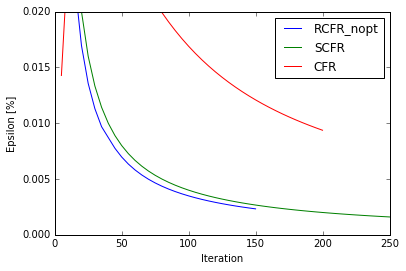

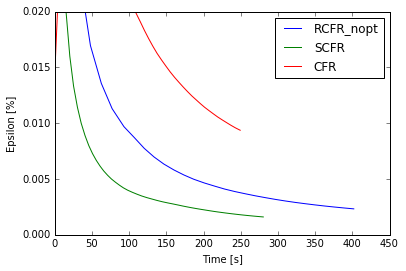

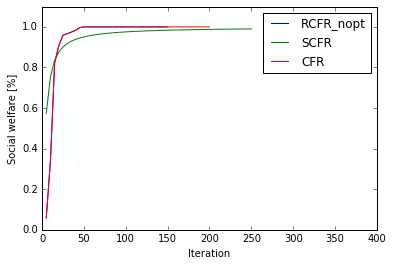

In [33]:
comparative_epsilon_graph(big_perm_res, delta_utility = delta_utility, legend = ['RCFR_nopt', 'SCFR', 'CFR'], 
                          ylims = (0, 0.02))
comparative_epsilon_graph(big_perm_res, delta_utility = delta_utility, legend = ['RCFR_nopt', 'SCFR', 'CFR'], 
                          ylims = (0, 0.02), xaxis = 'time')
comparative_epsilon_graph(big_perm_res, delta_utility = delta_utility, max_social_welfare = sum(max_u),
                          legend = ['RCFR_nopt', 'SCFR', 'CFR'], ylims = (0, 1.1), xlims = (0, 400),
                          yaxis = 'social_welfare')

---

In [50]:
from random import randint
import time

In [60]:
n_players = 3
branching_factor = 3
n_runs = 15
iterations = 500

--------------- Run 0 ---------------


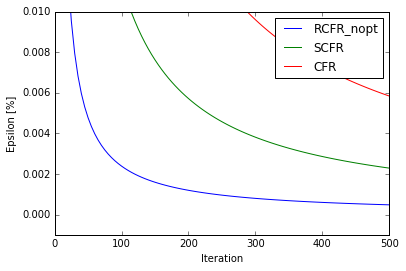

Run in 4.585877180099487 seconds
--------------- Run 1 ---------------


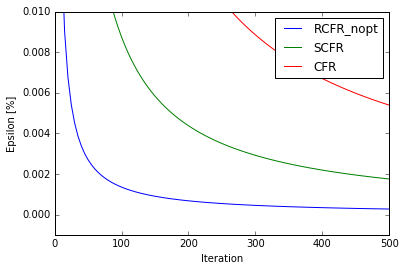

Run in 4.251394510269165 seconds
--------------- Run 2 ---------------
Run in 4.269402503967285 seconds
--------------- Run 3 ---------------
Run in 4.243277072906494 seconds
--------------- Run 4 ---------------
Run in 4.981836795806885 seconds
--------------- Run 5 ---------------
Run in 4.263184547424316 seconds
--------------- Run 6 ---------------
Run in 4.304856777191162 seconds
--------------- Run 7 ---------------
Run in 4.136937618255615 seconds
--------------- Run 8 ---------------


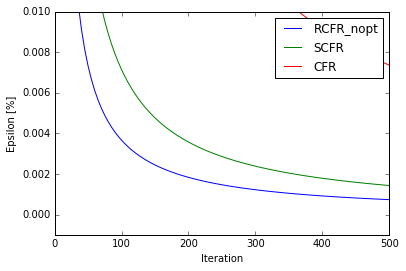

Run in 4.309679985046387 seconds
--------------- Run 9 ---------------
Run in 4.382358551025391 seconds
--------------- Run 10 ---------------
Run in 4.236195087432861 seconds
--------------- Run 11 ---------------


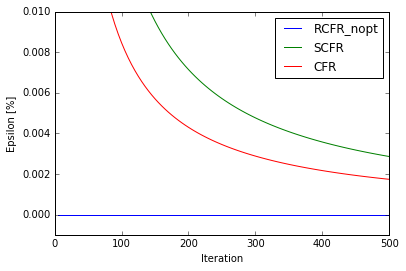

Run in 4.2888243198394775 seconds
--------------- Run 12 ---------------


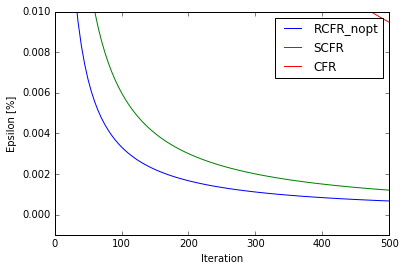

Run in 4.661894798278809 seconds
--------------- Run 13 ---------------
Run in 4.158122777938843 seconds
--------------- Run 14 ---------------
Run in 4.098013877868652 seconds


In [77]:
all_trees = []
all_results = []
all_params = []

for run in range(n_runs):
    start_time = time.time()
    
    utility_params = [[randint(-2, 2) for _ in range(branching_factor)] for _ in range(branching_factor)]
    for i in range(branching_factor):
        if utility_params[i][i] > 0:
            utility_params[i][i] = -utility_params[i][i]
    
    t = build_permutation_game_tree(n_players, branching_factor, utility_params)
    all_trees.append(t)
    
    print("--------------- Run " + str(run) + " ---------------")
    
    rs = []
    #print("--------------- RCFR ---------------")
    ct = CFRTree(t)
    rs.append(SolveWithReconstructionCFR(ct, iterations, reconstructEveryIteration = 5,
                                     reconstructWithOptimalPlan = False, checkEveryIteration = 5))
    #print("--------------- SCFR ---------------")
    ct = CFRTree(t)
    rs.append(SolveWithSampleCFR(ct, iterations, checkEveryIteration = 5))
    #print("--------------- CFR ---------------")
    ct = CFRTree(t)
    rs.append(SolveWithCFR(ct, iterations, checkEveryIteration = 5))
              
    leaves = set()
    ct.root.find_terminals(leaves)
    min_u = min(leaves, key = lambda n: n.utility[0]).utility
    max_u = max(leaves, key = lambda n: n.utility[0]).utility
    delta_utility = max_u[0] - min_u[0]
    
    all_params.append({'utility_params': utility_params, 'delta_utility': delta_utility,
                       'max_social_welfare': sum(max_u)})
              
    rcfr_final_epsilon = -min(rs[0]["graph_data"][-1:][0]["epsilon"]) / delta_utility
    cfr_final_epsilon = -min(rs[2]["graph_data"][-1:][0]["epsilon"]) / delta_utility
    
    rcfr_final_sw = sum(rs[0]["graph_data"][-1:][0]["utility"])
    cfr_final_sw = sum(rs[2]["graph_data"][-1:][0]["utility"])

    if rcfr_final_epsilon < cfr_final_epsilon / 10:
        comparative_epsilon_graph(rs, delta_utility, legend = ['RCFR_nopt', 'SCFR', 'CFR'], ylims = (-0.001, 0.01))
    if abs(rcfr_final_sw - cfr_final_sw) > 0.1:
        comparative_epsilon_graph(rs, delta_utility, legend = ['RCFR_nopt', 'SCFR', 'CFR'], 
                                  yaxis = 'social_welfare', max_social_welfare = sum(max_u))
    all_results.append(rs)
    
    print("Run in " + str(time.time() - start_time) + " seconds")

In [82]:
t = all_trees[9]

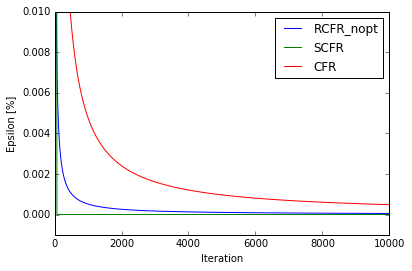

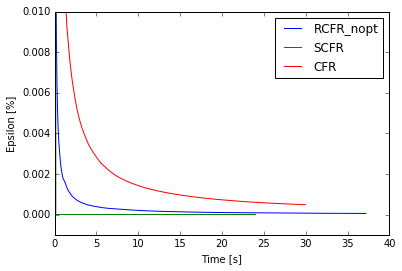

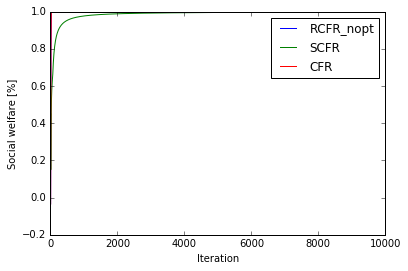

Run in 91.99356436729431 seconds


In [86]:
n_it = 10000

start_time = time.time()

rs = []
#print("--------------- RCFR ---------------")
ct = CFRTree(t)
rs.append(SolveWithReconstructionCFR(ct, n_it, reconstructEveryIteration = 5,
                                 reconstructWithOptimalPlan = False, checkEveryIteration = 5))
#print("--------------- SCFR ---------------")
ct = CFRTree(t)
rs.append(SolveWithSampleCFR(ct, n_it, checkEveryIteration = 5))
#print("--------------- CFR ---------------")
ct = CFRTree(t)
rs.append(SolveWithCFR(ct, n_it, checkEveryIteration = 5))

leaves = set()
ct.root.find_terminals(leaves)
min_u = min(leaves, key = lambda n: n.utility[0]).utility
max_u = max(leaves, key = lambda n: n.utility[0]).utility
delta_utility = max_u[0] - min_u[0]

comparative_epsilon_graph(rs, delta_utility, legend = ['RCFR_nopt', 'SCFR', 'CFR'], ylims = (-0.001, 0.01))
comparative_epsilon_graph(rs, delta_utility, legend = ['RCFR_nopt', 'SCFR', 'CFR'], ylims = (-0.001, 0.01),
                          xaxis = 'time')
comparative_epsilon_graph(rs, delta_utility, legend = ['RCFR_nopt', 'SCFR', 'CFR'], 
                              yaxis = 'social_welfare', max_social_welfare = sum(max_u))

print("Run in " + str(time.time() - start_time) + " seconds")

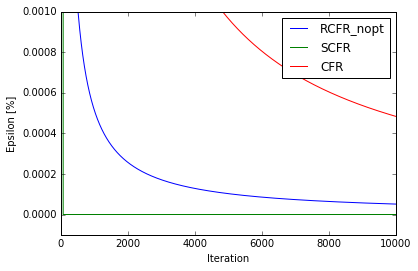

In [88]:
comparative_epsilon_graph(rs, delta_utility, legend = ['RCFR_nopt', 'SCFR', 'CFR'], ylims = (-0.0001, 0.001))

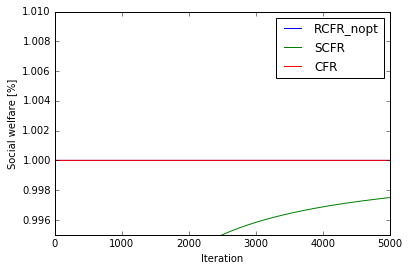

In [72]:
comparative_epsilon_graph(rs, delta_utility, legend = ['RCFR_nopt', 'SCFR', 'CFR'], 
                              yaxis = 'social_welfare', max_social_welfare = sum(max_u), ylims = (0.995, 1.01))

In [89]:
rcfr_final_epsilon = -min(rs[0]["graph_data"][-1:][0]["epsilon"]) / delta_utility
cfr_final_epsilon = -min(rs[2]["graph_data"][-1:][0]["epsilon"]) / delta_utility

(rcfr_final_epsilon, cfr_final_epsilon, cfr_final_epsilon / rcfr_final_epsilon)

(5.1429034067851376e-05, 0.00048389009098609437, 9.408889351250274)

In [90]:
all_params[9]

{'delta_utility': 8,
 'max_social_welfare': 20,
 'utility_params': [[-2, 2, 1], [1, -2, 1], [2, -2, -2]]}